# Otras estructuras de datos

Hasta ahora hemos introducido las listas de Python como estructura que nos permite manipular conjutos de datos. En esta sección veremos otras estructuras de datos e investigaremos cúando es conveniente usar cada una, en concreto vamos a ver
- tuplas
- diccionarios
- conjuntos
- generadores

---
## Tuplas

Las **tuplas** son similares a las listas en el sentido de que nos permiten guardar un número arbitrario de objetos y acceder a los mismos mediante índices, es decir, son objetos secuenciales. Para definir una tupla utilizamos paréntesis `()`

In [1]:
foo = (1, "b")  # sin la coma dentro del parentesis no seria una tupla

Al igual que con las listas, podemos incluir expresiones que se evaluarán antes de formar la tupla

In [2]:
bar = (1 is None, "fjkdsljfd".islower(), 2 in [1, 4, 5, 3])

<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-2-7dd81825fdfb>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
  bar = (1 is None, "fjkdsljfd".islower(), 2 in [1, 4, 5, 3])


In [3]:
bar

(False, True, False)

In [4]:
isinstance(bar, tuple)

True

In [5]:
type(foo)

tuple

Las tuplas son utilizadas para guardar una colección de datos en una estructura simple e **inmutable**, es decir, no podremos modificarlas una vez sean creadas: ni reemplezar, añadir o borrar sus elementos. Dicho de otro modo, es un único objeto formado por distintas partes más que una colección de distintos objetos como una lista.

:::{exercise}
:label: other-data-structures-tuples-inmmutable

¿Qué error obtenemos al intentar modificar un objeto de una tupla?

:::

In [6]:
t = (1, 2, 3)
type(t)

tuple

In [7]:
l = (1, 2, 3)
l[0] = "foo"  # No puedo asignar nada en un indice de una tupla
print(l)

TypeError: ignored

:::{exercise}
:label: other-data-structures-tuples-inmmutable-2

Las tuplas son objetos inmutables pero, ¿pueden los objetos que forman la tupla ser mutables?

:::

In [8]:
t = (1, 2, [1, 2])
t[2][1] = "foo" #El primer elemento de la lista en la posicion 2 de la tupla valga foo
print(t)
# No puedo modificar 2 directamente pero si puedo acceder a los objetos de dentro de 2
# a menos que 2 sea otra tupla u otro elemento no mutable

(1, 2, [1, 'foo'])


Por consistencia, existen las tuplas de longitud 0 y 1

In [9]:
zero_tuple = ()
one_tuple = (5,) # notemos la coma para q no sea un entero y sea una tupla

Aunque podemos utilizar índices numéricos para acceder a los elementos de la tupla, es más común *deshacer* la tupla en variables

In [10]:
holding = ('GOOG', 100, 490.10)
address = ('www.python.org', 80)

name, shares, price = holding
host, port = address

> Esta misma sintaxis se puede utilizar para hacer varias asignaciones a la vez
```
a, b = 1, None
```

El segundo argumento de la funión `isinstance` puede ser una tupla de tipos, de modo que devolverá `True` si el objeto es de alguno de los tipos que forman la tupla.

In [11]:
isinstance(1, (bool, int)) #la segunda tupla es como o bool o int, con 1 verdadera ya sale True

True

---
## Trabajando con secuencias

Ya hemos visto tres tipos secuenciales: cadenas, listas y tuplas. Vamos a dedicar un apartado a repasar las principales operaciones que podemos realizar con objetos secuenciales

### Comprobar pertenencia

Lo haremos a través del operador `in` y su negación `not in`

In [12]:
# con tuplas
x = (1, 3, 5)
3 in x

True

In [13]:
# con cadenas
"cat" in "the cat in the hat"
True

True

In [14]:
# con listas
[1, 2] in [1, 2, 3, 4]

False

In [15]:
[1, 2] in [None, [1, 2], None]

True

### Obtener el índice de la primera instancia de un objeto

Mediante el método `index`

In [16]:
"cat cat cat".index("cat")

0

In [18]:
[1, 2, "moo"].index("moo")

2

### Contar el número de ocurrencias

Utilizaremos el método `count`

In [19]:
"the cat in the hat".count("h")

3

### Indexado y *slicing*

Como ya hemos visto, podemos acceder a objetos individuales utilizando in índice entero que empieza en cero. Este índice puede ser negativo si queremos buscar desde el final de la secuencia

In [21]:
l = [1, 1, 2, 3, 5, 8, 13, 21]
l[-1]

21

Podemos ir más allá y pedir un subconjunto de la sucencia con las operaciones de *slicing*, cuya sintaxis básica es `seq[start:stop:step]`

In [24]:
seq = "abcdefg"
seq[0:4:1]

'abcd'

In [25]:
seq[::2]

'aceg'

Por defecto, `start=0`, `stop=len(seq)` y `step=1`. Si utilizamos valores negativos para `step` invertiremos el orden de la secuencia

In [26]:
seq[::-1]

'gfedcba'

Aunque la sintaxis con `:` es la más frecuente, está bien saber que en Python existe el objeto de tipo `slice` para definir nuestra selección de forma independiente a la secuencia. Para ello utilizamos el tipo `slice` con los tres argumentos que hemos visto: `start`, `stop` y `step`.

In [29]:
reverse = slice(None, None, -1)

In [30]:
type(reverse)

slice

:::{exercise}
:label: other-data-structures-slices

¿Qué error obtenemos cuando intentamos acceder a un índice que no existe para una secuencia?

:::

In [31]:
l = [2, 3, 4]
l[3]

IndexError: ignored

:::{exercise}
:label: other-data-structures-slices-2

Considera la siguiente tupla

```
x = (0, 2, 4, 6, 8)
```

Indexa o utiliza slides para obtener
1. `0`
2. `8`
3. `(2, 4, 6)`
4. `(4,)`
5. `4`
6. `4` utilizando un índice negativo
7. `(6, 8)`
8. `(2, 6)`
9. `(8, 6, 4, 2)`

:::

In [47]:
x = (0, 2, 4, 6, 8)
print(x[0])
print(x[-1])
print(x[1:4:1])
print((x[2],))
print(x[2])
print(x[-3])
print(x[3:5:1])
print(x[1:5:2])
print(x[5:0:-1])

0
8
(2, 4, 6)
(4,)
4
4
(6, 8)
(2, 6)
(8, 6, 4, 2)


In [48]:
x = (0, 2, 4, 6, 8)

answer = [
    x[0],
    x[-1],
    x[1:4],
    x[2:3],
    x[2],
    x[-3],
    x[-2:],
    x[1::2],
    x[-1:0:-1]
]
print(answer)

[0, 8, (2, 4, 6), (4,), 4, 4, (6, 8), (2, 6), (8, 6, 4, 2)]


:::{exercise}
:label: other-data-structures-slices-3

Dada una tupla `x` que contenga el número `5`, escribe las instrucciones necesarias para reemplazar la primera instancia de `5` por `-5`.

:::

In [ ]:
# No se puede, las tuplas son inmutables

---
## Diccionarios



Un **diccionario** es un objeto que nos permite guardar campos informados mediante una clave. Para crearlos escribimos pares de clave - valor separados por `:` entre corchetes

In [49]:
prices = {
    "GOOG": 490.1,
    "AAPL": 123.5,
    "IBM": 91.5,
    "MSFT": 52.13
}

# diccionario vacío
empty_dict = {}    # también se crea con dict()

Se pueden crear también diccionarios a partir del constructor `dict`, que acepta un iterable de pares de clave-valor empaquetados en una secuencia.   

In [50]:
fruit_or_veggie = dict([("apple", "fruit"), ("carrot", "vegetable")])

Para acceder a un valor del diccionario a través de la clave se pueden utilizar corchetes `[]` con la clave entre comillas

In [51]:
prices["GOOG"]

490.1

aunque es más recomendable utilizar el método `get`, ya que si la clave buscada no se encuentra devuelve un `None` o el valor por defecto que le indiquemos, en lugar de levantar un error tipo `KeyError`.

In [52]:
prices.get("GOOG")

490.1

In [53]:
prices.get("AMZ", 0.0)    # devuelve 0.0 si no encuentra la clave AMZ

0.0

In [54]:
prices["AMZ"]

KeyError: ignored

Los diccionarios son objetos **mutables**, podemos añadir elementos directamente

In [55]:
prices["AMZ"] = 90.98
prices

{'GOOG': 490.1, 'AAPL': 123.5, 'IBM': 91.5, 'MSFT': 52.13, 'AMZ': 90.98}

para ello también tenemos el método `update`, que acepta otro diccionario o un iterable de pares clave-valor.

In [56]:
fruit_or_veggie.update([("grape", "fruit"), ("onion", "vegetable")])
fruit_or_veggie

{'apple': 'fruit',
 'carrot': 'vegetable',
 'grape': 'fruit',
 'onion': 'vegetable'}

In [59]:
fruit_or_veggie["apple"] = "evil fruit"
fruit_or_veggie

{'apple': 'evil fruit',
 'carrot': 'vegetable',
 'grape': 'fruit',
 'onion': 'vegetable'}

para borrar un elemento utilizamos `del` (leventa error si no encuentra la clave) o el método `pop` o `remove` como vimos en listas.

In [ ]:
del prices["AMZ"]  #del es delit y es para borrar

In [ ]:
prices

{'GOOG': 490.1, 'AAPL': 123.5, 'IBM': 91.5, 'MSFT': 52.13}

:::{exercise}
:label: other-data-structures-dict

Dada la siguiente tupla de nombres

```
("Alicia", "Eva", "Manolo", "Virginia")
```

y sus correspondientes calificaciones

```
(5.2, 9.1, 7.2, 4.9)
```

crea un diccionario que mapee nombres con calificaciones. Luego, actualiza la nota de Virginia a un `5.0`. Finalmente, añade a Alberto, que ha cateado con un `2.7`.

:::

In [60]:
notas = {
        "Alicia" : 5.2,
        "Eva" : 9.1,
        "Manolo" : 7.2,
        "Virginia" : 4.9}

print(notas)

# actualizamos la nota de virginia:
notas["Virginia"] = 5.0

# Añadimos a Alberto:
notas["Alberto"] = 2.7

print("Despues de las modificaciones...")
print(notas)

{'Alicia': 5.2, 'Eva': 9.1, 'Manolo': 7.2, 'Virginia': 4.9}
Despues de las modificaciones...
{'Alicia': 5.2, 'Eva': 9.1, 'Manolo': 7.2, 'Virginia': 5.0, 'Alberto': 2.7}


> Un diccionario **puede almacenar cualquier tipo de objeto**, pero las claves deben ser siempre **inmutables**, o más generalmente, **hasheables**.

In [61]:
example_dict = {
    -1: 10,
    "moo": True,
    (1, 2): print,
    3.4: "cow", # es altamente no recomendable usar floats como claves
    False:[]
}

:::{exercise}
:label: other-data-structures-dict-2

¿Qué tipo de error obtenemos al crear un diccionario con una clave que sea mutable?

:::

In [62]:
{
    [1,2]:None
}

TypeError: ignored

Cuando iteramos sobre un diccionario, se utilizan las claves como referencia. Por ejemplo

In [63]:
example_dict = {"key1": "value1", "key2": "value2", "key3": "value3"}

In [64]:
list(example_dict) # pasar del diccionario a lista, pero los valores no los saca,
# Solo saca las variables

['key1', 'key2', 'key3']

In [65]:
"value1" in example_dict

False

In [66]:
len(example_dict) # nos da el número de claves

3

Para acceder a los valores de un diccionario, hay que invocar al método `values`. Si queremos los pares clave-valor como duplas, llamamos a `items`

In [ ]:
list(example_dict.values())

In [ ]:
list(example_dict.items())

Los diccionarios son objetos **iterables**

In [67]:
x, s = {"a": "foo", 1: "bar"}

In [68]:
x

'a'

In [69]:
s

1

In [70]:
for k in example_dict:
    print(k)

key1
key2
key3


---
## Conjuntos

Los **conjuntos** nos sirven para crear una estructura de objetos **únicos** y **sin orden**. Por lo tanto son útiles para
- Filtrar objetos repetidos de una colección.
- Comprobar pertenencia de un objeto en tiempo constante.
- Verificar si una colección de objetos contiene a otra.
La estructura de conjunto utiliza el método `__hash__` que incoporan los objetos hasheables para guardarlos. Es parecido a los diccionarios pero sin utilizar una clave, por lo tanto **no podemos guardar objetos mutables en un conjunto**.

Para crear un conjunto utilizamos corchetes `{}` o la función `set`, a la que podemos pasar cualquier iterable.

In [71]:
my_set = {1, 3.4, "apple", False, (1, 2, 3)}
my_set

{(1, 2, 3), 1, 3.4, False, 'apple'}

In [72]:
{"foo", "bar", ["baz"]}

TypeError: ignored

Al igual que los diccionarios, los conjuntos son objetos **iterables que no son secuencias**. A continuación mostramos las operaciones más usuales entre conjuntos

In [73]:
x = {"a", "b", "c", "d"}
y = {"a", "b", "e"}

# unión
x | y  # o x.union(y)
# {'a', 'b', 'c', 'd', 'e'}

# intersección
x & y  # o x.intersection(y)
# {'a', 'b'}

# diferencia
x - y  # o x.difference(y)
# {'c', 'd'}

# diferencia simétrica
x ^ y  # o x.symmetric_difference(y)
# {'c', 'd', 'e'}

# verifica subconjunto
{1, 2, 3, 4} >= {1, 2}
# True

# verifica igualdad
{1, 2, 3, 4} == {1, 2}
# False

False

Los conjuntos con objetos **mutables**, podemos modificarlos con los métodos `add` (añade un elemento), `update` (añade varios elementos mediante un iterable) o `remove`. Existe una versión **inmutable** de los conjuntos, llamada `fronzenset`.

:::{exercise}
:label: other-data-structures-sets

Considera las siguientes listas de nombres:

```
A = ["Bohr", "Curie", "David", "Euler", "Fermi", "Feynman", "Gauss", "Heisenberg", "Noether", "Gauss"]
```

```
B = ["Bohm", "Bohr", "Einstein", "Fermi", "Gauss", "Hopper", "Montalcini", "Fermi", "Einsteins"]
```

Escribe expresiones que devuelvan:
1. Número total de nombres únicos.
2. Nombres de A que no están en B.
3. Número de nombres de A que no están en B o nombres de B que no están en A


:::

Existen otras muchas estructuras de datos altamente optimizadas para tareas concretas en el módulo [`collections`](https://docs.python.org/3/library/collections.html)

In [79]:
A = ["Bohr", "Curie", "David", "Euler", "Fermi", "Feynman", "Gauss", "Heisenberg", "Noether", "Gauss"]
B = ["Bohm", "Bohr", "Einstein", "Fermi", "Gauss", "Hopper", "Montalcini", "Fermi", "Einsteins"]

# 1. Número total de nombres únicos.
C = set(A) | set(B)
print(len(C))

# 2. Nombres de A que no están en B.
D = set(A) - set(B)
print(D)

# 3. Número de nombres de A que no están en B o nombres de B que no están en A
len(set(A)^set(B))

14
{'Feynman', 'David', 'Noether', 'Curie', 'Heisenberg', 'Euler'}


11

---
## Generadores

Los **generadores** nos permiten generar en forma de promesa un número arbitrario de items sin necesidad de guardarlos en memoria. Se trata de un objeto iterable, pero que genera cada uno de sus miembros en orden cuando las iteraciones lo vayan requiriendo. Ya hemos visto un ejemplo de generador cuando hemos utilizado la función `range`. Es bastante común contruir listas, tuplas o conjuntos a partir de un generador.

Una sintaxis disponible para crear un generador es la siguiente

```
(<expression> for <var> in <iterable> if <condition>)
```


Por ejemplo,

In [80]:
even_gen = (i for i in range(100) if i%2 == 0)
print(even_gen) #python no lo calcula solo lo define hasta que sea necesario

<generator object <genexpr> at 0x7e10e86cba00>


In [82]:
import string
is_not_vocal = {c for c in string.ascii_lowercase if c not in ["a", "e", "i", "o", "u"]}

In [83]:
list(is_not_vocal)

['s',
 'c',
 'k',
 'y',
 'm',
 'w',
 'r',
 't',
 'g',
 'q',
 'p',
 'v',
 'f',
 'x',
 'j',
 'b',
 'h',
 'z',
 'd',
 'l',
 'n']

:::{exercise}
:label: other-data-structures-generators

Estudia cómo evoluciona el tamaño en memoria de un generador un función de su tamaño.

:::

In [85]:
import sys
print(sys.getsizeof(i for i in range(10)))  # El tamaño en memoria
print(sys.getsizeof(i for i in range(100)))
print(sys.getsizeof(i for i in range(1000)))

104
104
104


Podemos aplicar métodos propios de un objeto iterable como `all` o `sum` a un generador. También son bastante útiles a la hora de definir listas, diccionarios o conjuntos mediante las denominadas **expresiones de comprensión**

In [86]:
# crea una lista
my_list = [i for i in range(100) if i%2 == 0]

# crea una tupla
my_tuple = tuple(i for i in range(100) if i%2==0)

# crea un conjunto
my_set = {i for i in range(100) if i%2 == 0}

En los tres casos, lo que hace python es crear un generador y a partir del mismo llamar a las funciones `list`, `tuple` y `set`. En caso de los diccionarios, también existe una sintaxis similar

In [87]:
# crea un diccionario
keys = ["key1", "key2", "key3"]
values = ["value1", "value2", "value3"]
my_dict = {key:value for key, value in zip(keys, values)}

In [88]:
l = [i for i in range(10)]
t = tuple(c for c in string.ascii_lowercase)
z = zip(l,t) # hasta q no se necesite no se crea
pairs = [(x,y)  for x, y in z] # aqui se crea el zip porque es necesario

print(l)
print(t)
print(z)
print(pairs)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
('a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z')
[(0, 'a'), (1, 'b'), (2, 'c'), (3, 'd'), (4, 'e'), (5, 'f'), (6, 'g'), (7, 'h'), (8, 'i'), (9, 'j')]


La función `zip` crea un iterable de tuplas de longitud 2 con los items del primer y segundo argumento, respectivamete.

Para iterar sobre los elementos de un generador, podemos utilizar la función `next`

In [89]:
next(even_gen)

0

In [90]:
next(even_gen)

2

In [92]:
g = (i for i in range(5))

In [98]:
next(g) # cuando llega al limite del conjunto

StopIteration: ignored

Cuando un objeto además de ser un iterable tiene la capacidad de almacenar el estado de su iteración, se dice que es un **iterador**.

:::{exercise}
:label: other-data-structures-generators-2

Considera las siguientes expresiones

```
sum(1/n for n in range(1, 101))
```

```
sum([1/n for n in range(1, 101)])
```

¿Cuál es más eficiente? ¿Por qué?

:::

In [99]:
sum(1/n for n in range(1, 101))
# 1. Crea el generador (lazy)
# 2. Llama a next para obtener el primero
# 3. Va sumando y llamando a next en cada iteracion


sum([1/n for n in range(1, 101)])
# 1. crea la lista (vacia)
# 2. recorre range(1,101) y para cada iteracion, va guardanado en memoria
# 3. calcula la suma

# El primero es mejor, ya que el segundo guarda las 101 iteraciones

5.187377517639621

Existe otra forma más general de definir los generadores, que es utilizando la palabra reservada `yield` dentro de una función. Si escribimos uno o más declaraciones `yield` dentro de una función, al llamar a esta se creará un generador, veremos esto más adelante en [en la sección dedicada a funciones](https://javlintor.github.io/curso-python-us/notebooks/introduction-python/functions.html)

---
## Comparación complejidad computacional

Vamos a comparar las diferentes estructuras de datos que hemos visto en cuanto a su tiempo de cómputo para diferentes tareas. No te preocupes ahora mismo por el código utilizado para hacer estas pruebas y pintar las gráficas.

### Pertenencia


In [100]:
%config InlineBackend.figure_format='retina'  # Esto es para que los dibujos se vean bien

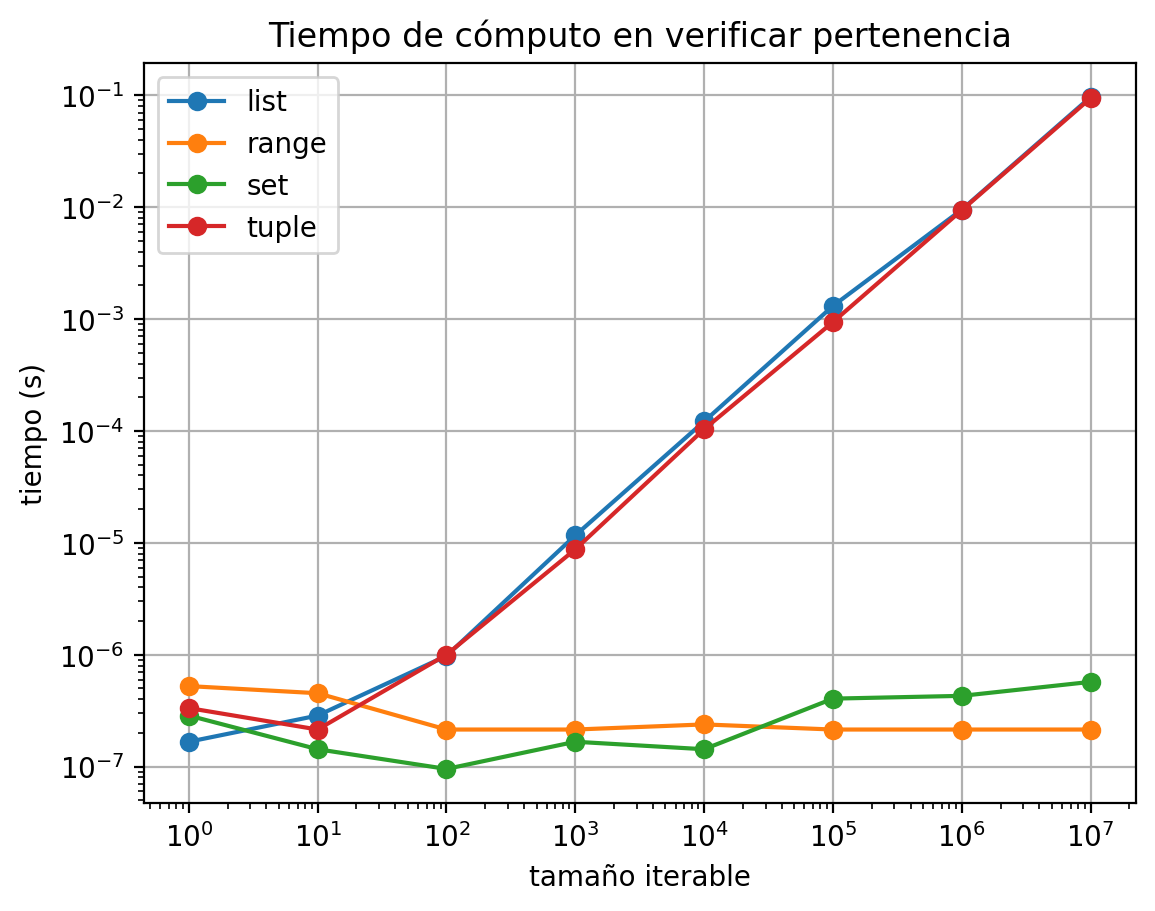

In [101]:
import time
import numpy as np
import matplotlib.pyplot as plt


def get_membership_time_from_range(i):
    iterable = range(i)
    execution_time = get_membership_time_from_iterable(i - 1, iterable)
    return execution_time

def get_membership_time_from_list(i):
    iterable = list(range(i))
    execution_time = get_membership_time_from_iterable(i - 1, iterable)
    return execution_time

def get_membership_time_from_set(i):
    iterable = set(range(i))
    execution_time = get_membership_time_from_iterable(i - 1, iterable)
    return execution_time

def get_membership_time_from_tuple(i):
    iterable = tuple(range(i))
    execution_time = get_membership_time_from_iterable(i - 1, iterable)
    return execution_time

def get_membership_time_from_iterable(i, iterable, repeat=10):
    execution_times = []
    for _ in range(repeat):
        start = time.time()
        i in iterable
        end = time.time()
        execution_time = end - start
        execution_times.append(execution_time)
    mean_execution_time = np.mean(execution_times)
    return mean_execution_time

n = [10**i for i in range(8)]
t_range = [get_membership_time_from_range(i) for i in n]
t_list = [get_membership_time_from_list(i) for i in n]
t_set = [get_membership_time_from_set(i) for i in n]
t_tuple = [get_membership_time_from_tuple(i) for i in n]

fig, ax = plt.subplots()
ax.plot(n, t_list, "o-", label="list")
ax.plot(n, t_range, "o-", label="range")
ax.plot(n, t_set, "o-", label="set")
ax.plot(n, t_tuple, "o-", label="tuple")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("tamaño iterable")
ax.set_ylabel("tiempo (s)")
ax.set_title("Tiempo de cómputo en verificar pertenencia")
ax.grid(True)
ax.legend()
fig.show()

## Borra un elemento

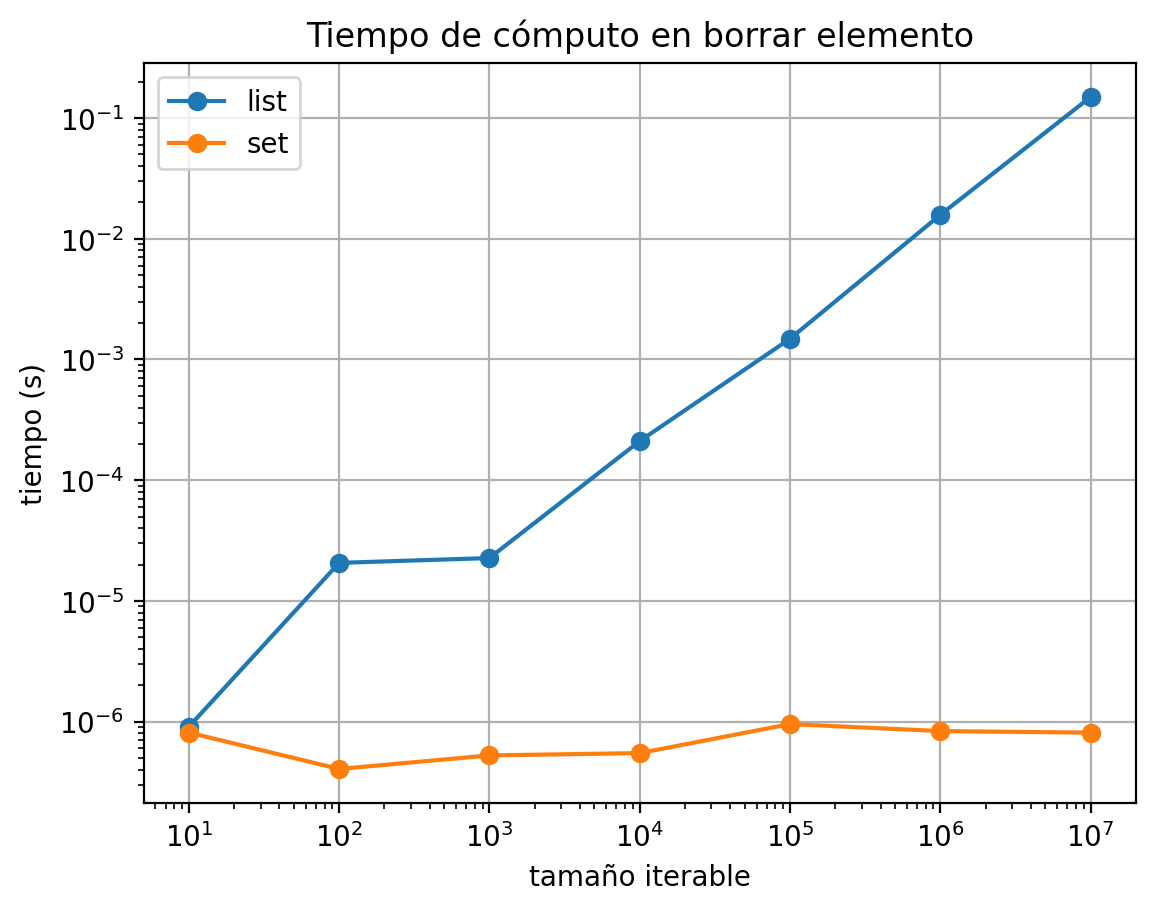

In [102]:
repeat = 10

def get_deletion_time_from_list(i):
    iterable = list(range(i))
    execution_times = []
    for _ in range(repeat):
        start = time.time()
        iterable.remove(i - 1)
        end = time.time()
        execution_time = end - start
        iterable.append(i - 1)
        execution_times.append(execution_time)
    mean_execution_time = np.mean(execution_times)
    return mean_execution_time

def get_deletion_time_from_set(i):
    iterable = set(range(i))
    execution_times = []
    for _ in range(repeat):
        start = time.time()
        iterable.remove(i - 1)
        end = time.time()
        execution_time = end - start
        iterable.add(i - 1)
        execution_times.append(execution_time)
    mean_execution_time = np.mean(execution_times)
    return mean_execution_time

n = [10**i for i in range(1, 8)]
t_list = [get_deletion_time_from_list(i) for i in n]
t_set = [get_deletion_time_from_set(i) for i in n]

fig, ax = plt.subplots()
ax.plot(n, t_list, "o-", label="list")
ax.plot(n, t_set, "o-", label="set")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("tamaño iterable")
ax.set_ylabel("tiempo (s)")
ax.set_title("Tiempo de cómputo en borrar elemento")
ax.grid(True)
ax.legend()
fig.show()

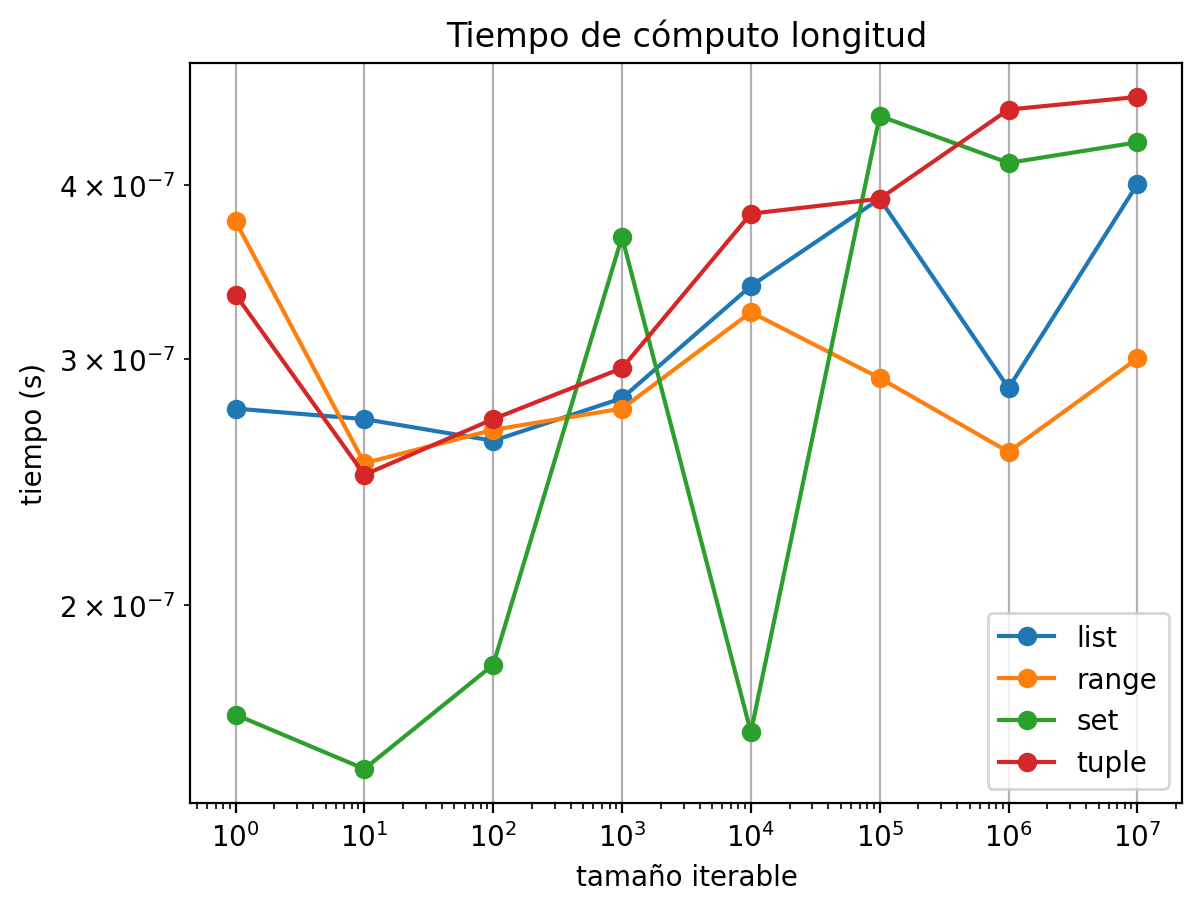

In [103]:
def get_len_time_from_range(i):
    iterable = range(i)
    execution_time = get_len_time_from_iterable(iterable)
    return execution_time

def get_len_time_from_list(i):
    iterable = list(range(i))
    execution_time = get_len_time_from_iterable(iterable)
    return execution_time

def get_len_time_from_set(i):
    iterable = set(range(i))
    execution_time = get_len_time_from_iterable(iterable)
    return execution_time

def get_len_time_from_tuple(i):
    iterable = tuple(range(i))
    execution_time = get_len_time_from_iterable(iterable)
    return execution_time

def get_len_time_from_iterable(iterable, repeat=50):
    execution_times = []
    for _ in range(repeat):
        start = time.time()
        len(iterable)
        end = time.time()
        execution_time = end - start
        execution_times.append(execution_time)
    mean_execution_time = np.mean(execution_times)
    return mean_execution_time

n = [10**i for i in range(8)]
t_range = [get_len_time_from_range(i) for i in n]
t_list = [get_len_time_from_list(i) for i in n]
t_set = [get_len_time_from_set(i) for i in n]
t_tuple = [get_len_time_from_tuple(i) for i in n]

fig, ax = plt.subplots()
ax.plot(n, t_list, "o-", label="list")
ax.plot(n, t_range, "o-", label="range")
ax.plot(n, t_set, "o-", label="set")
ax.plot(n, t_tuple, "o-", label="tuple")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("tamaño iterable")
ax.set_ylabel("tiempo (s)")
ax.set_title("Tiempo de cómputo longitud")
ax.grid(True)
ax.legend()
fig.show()